# Regression Model

## DataSet - WNBA players stats

## Step 1 - Calling libraries 

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as nm
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


## Step 2 - Data defining, Data cleaning and Data preparation

In [2]:
df = pd.read_csv('wnba-player-stats.csv')

In [3]:
df.head(5)


,player_ID,Player,year_ID,Age,Tm,tm_gms,Tm_Net_Rtg,Pos,G,MP,...,STL_pct,BLK_pct,TOV_pct,USG_pct,OWS,DWS,WS,WS40,Composite_Rating,Wins_Generated
0,montgre01w,Renee Montgomery,2019,32,ATL,34,-9.8,G,34,949,...,1.7,0.5,16.8,17.5,0.4,0.5,0.9,0.039,-2.4,1.22
1,williel01w,Elizabeth Williams,2019,26,ATL,34,-9.8,C-F,32,909,...,1.4,4.7,12.9,15.9,1.6,1.0,2.7,0.117,0.6,2.51
2,sykesbr01w,Brittney Sykes,2019,25,ATL,34,-9.8,G,34,880,...,1.2,1.5,14.8,23.1,-0.8,0.8,0.0,-0.001,-3.4,0.70
3,hayesti01w,Tiffany Hayes,2019,29,ATL,34,-9.8,G,29,817,...,1.8,0.8,14.0,27.1,0.5,0.6,1.0,0.050,-1.5,1.45
4,brelaje01w,Jessica Breland,2019,31,ATL,34,-9.8,F,33,767,...,2.8,3.6,11.6,18.9,-0.4,1.9,1.5,0.076,-0.8,1.62


In [4]:
df.shape

(3883, 28)

### Dropping unrelated columns for the Model


In [5]:
cols = [0,1,2,3,4,5,6,7]
df.drop(df.columns[cols],axis=1,inplace=True)

In [6]:
df

,G,MP,MP_pct,PER,TS_pct,ThrPAr,FTr,ORB_pct,TRB_pct,AST_pct,STL_pct,BLK_pct,TOV_pct,USG_pct,OWS,DWS,WS,WS40,Composite_Rating,Wins_Generated
0,34,949,69.5%,11.1,0.520,0.727,0.176,1.0,4.1,18.0,1.7,0.5,16.8,17.5,0.4,0.5,0.9,0.039,-2.4,1.22
1,32,909,66.6%,16.7,0.521,0.000,0.477,11.4,12.1,7.8,1.4,4.7,12.9,15.9,1.6,1.0,2.7,0.117,0.6,2.51
2,34,880,64.5%,11.3,0.445,0.308,0.259,3.0,9.1,19.6,1.2,1.5,14.8,23.1,-0.8,0.8,0.0,-0.001,-3.4,0.70
3,29,817,59.9%,15.1,0.497,0.313,0.340,2.7,5.7,21.9,1.8,0.8,14.0,27.1,0.5,0.6,1.0,0.050,-1.5,1.45
4,33,767,56.2%,15.2,0.425,0.138,0.120,5.7,16.6,14.2,2.8,3.6,11.6,18.9,-0.4,1.9,1.5,0.076,-0.8,1.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,19,286,25.3%,10.1,0.431,0.110,0.171,8.5,10.7,5.9,2.4,0.3,16.2,16.4,0.0,0.0,0.0,0.002,-4.0,0.15
3879,13,268,23.7%,9.1,0.610,0.103,0.552,5.0,8.0,7.0,1.8,1.2,33.3,9.0,0.1,-0.1,0.0,0.005,-4.1,0.13
3880,26,263,23.3%,12.4,0.477,0.013,0.200,7.2,7.9,8.5,2.6,3.3,12.1,16.8,0.4,0.0,0.4,0.060,-2.1,0.38
3881,8,43,3.8%,16.0,0.432,0.000,0.154,10.3,9.4,4.9,1.2,5.5,0.0,14.4,0.1,0.0,0.1,0.092,-0.6,0.09


In [7]:
df.shape

(3883, 20)

### Check for null entries if any

In [8]:
df[df.isnull().any(axis=1)]

,G,MP,MP_pct,PER,TS_pct,ThrPAr,FTr,ORB_pct,TRB_pct,AST_pct,STL_pct,BLK_pct,TOV_pct,USG_pct,OWS,DWS,WS,WS40,Composite_Rating,Wins_Generated
12,1,0,0.0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.00
93,1,1,0.1%,-19.9,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.017,-7.6,0.00
177,1,1,0.1%,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.017,-4.3,0.00
191,1,2,0.1%,-9.3,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-0.039,-8.4,0.00
221,1,3,0.2%,-6.1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-0.015,-6.5,0.00
439,1,1,0.1%,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.017,-4.5,0.00
469,1,2,0.1%,-10.5,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-0.014,-7.9,0.00
601,1,0,0.0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.00
646,2,6,0.4%,3.6,1.136,NaN,NaN,0.0,0.0,0.0,0.0,0.0,53.2,14.6,0.0,0.0,0.0,0.047,-3.4,0.00
856,2,1,0.1%,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-0.023,-5.9,0.00


### Drop null entries


In [9]:
df.dropna(axis = 0, inplace = True)


### Recheck for null values


In [10]:
df[df.isnull().any(axis=1)]

,G,MP,MP_pct,PER,TS_pct,ThrPAr,FTr,ORB_pct,TRB_pct,AST_pct,STL_pct,BLK_pct,TOV_pct,USG_pct,OWS,DWS,WS,WS40,Composite_Rating,Wins_Generated


### Datatype check for each attribute


In [11]:
df.dtypes

G                     int64
MP                    int64
MP_pct               object
PER                 float64
TS_pct              float64
ThrPAr              float64
FTr                 float64
ORB_pct             float64
TRB_pct             float64
AST_pct             float64
STL_pct             float64
BLK_pct             float64
TOV_pct             float64
USG_pct             float64
OWS                 float64
DWS                 float64
WS                  float64
WS40                float64
Composite_Rating    float64
Wins_Generated      float64
dtype: object

### For attribute 'MP_pct' Removing the special character and converting to float from object type.


In [12]:

df['MP_pct'] = df['MP_pct'].str.rstrip('%').astype(float)

In [13]:
df.head()

,G,MP,MP_pct,PER,TS_pct,ThrPAr,FTr,ORB_pct,TRB_pct,AST_pct,STL_pct,BLK_pct,TOV_pct,USG_pct,OWS,DWS,WS,WS40,Composite_Rating,Wins_Generated
0,34,949,69.5,11.1,0.520,0.727,0.176,1.0,4.1,18.0,1.7,0.5,16.8,17.5,0.4,0.5,0.9,0.039,-2.4,1.22
1,32,909,66.6,16.7,0.521,0.000,0.477,11.4,12.1,7.8,1.4,4.7,12.9,15.9,1.6,1.0,2.7,0.117,0.6,2.51
2,34,880,64.5,11.3,0.445,0.308,0.259,3.0,9.1,19.6,1.2,1.5,14.8,23.1,-0.8,0.8,0.0,-0.001,-3.4,0.70
3,29,817,59.9,15.1,0.497,0.313,0.340,2.7,5.7,21.9,1.8,0.8,14.0,27.1,0.5,0.6,1.0,0.050,-1.5,1.45
4,33,767,56.2,15.2,0.425,0.138,0.120,5.7,16.6,14.2,2.8,3.6,11.6,18.9,-0.4,1.9,1.5,0.076,-0.8,1.62


In [14]:
df.dtypes

G                     int64
MP                    int64
MP_pct              float64
PER                 float64
TS_pct              float64
ThrPAr              float64
FTr                 float64
ORB_pct             float64
TRB_pct             float64
AST_pct             float64
STL_pct             float64
BLK_pct             float64
TOV_pct             float64
USG_pct             float64
OWS                 float64
DWS                 float64
WS                  float64
WS40                float64
Composite_Rating    float64
Wins_Generated      float64
dtype: object

### Data Description

In [15]:
#limiting the decimal digits to two
pd.set_option('precision', 2)
df.describe()

,G,MP,MP_pct,PER,TS_pct,ThrPAr,FTr,ORB_pct,TRB_pct,AST_pct,STL_pct,BLK_pct,TOV_pct,USG_pct,OWS,DWS,WS,WS40,Composite_Rating,Wins_Generated
count,3839.00,3839.00,3839.00,3839.00,3839.00,3839.00,3839.00,3839.00,3839.00,3839.00,3839.00,3839.00,3839.00,3839.00,3839.00,3839.00,3839.00,3.84e+03,3839.00,3839.00
mean,24.83,511.17,38.03,12.07,0.48,0.24,0.32,6.18,9.89,13.21,2.01,1.53,18.77,18.97,0.68,0.60,1.28,5.80e-02,-1.63,1.27
std,10.05,348.51,25.95,7.54,0.12,0.22,0.27,4.65,4.60,8.10,1.28,1.82,8.52,5.10,1.26,0.65,1.70,1.23e-01,4.52,1.45
min,1.00,1.00,0.10,-43.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.20,-1.90,-0.80,-1.80,-1.13e+00,-41.40,-0.87
25%,18.00,186.00,13.85,8.60,0.44,0.02,0.18,2.80,6.40,7.50,1.30,0.30,13.90,15.50,-0.10,0.10,0.00,9.00e-03,-3.60,0.13
50%,29.00,484.00,36.10,12.40,0.50,0.21,0.28,5.40,9.20,11.90,1.90,0.90,17.30,18.80,0.20,0.40,0.70,7.00e-02,-1.30,0.76
75%,33.00,823.50,61.20,16.40,0.54,0.40,0.40,8.80,13.00,17.80,2.60,2.10,22.20,22.20,1.20,0.90,2.10,1.26e-01,0.90,2.04
max,34.00,1234.00,95.30,78.90,1.50,1.00,6.00,60.40,43.90,83.80,28.10,24.20,87.50,60.40,8.10,3.80,10.00,1.34e+00,42.90,8.26


### Correlation Check

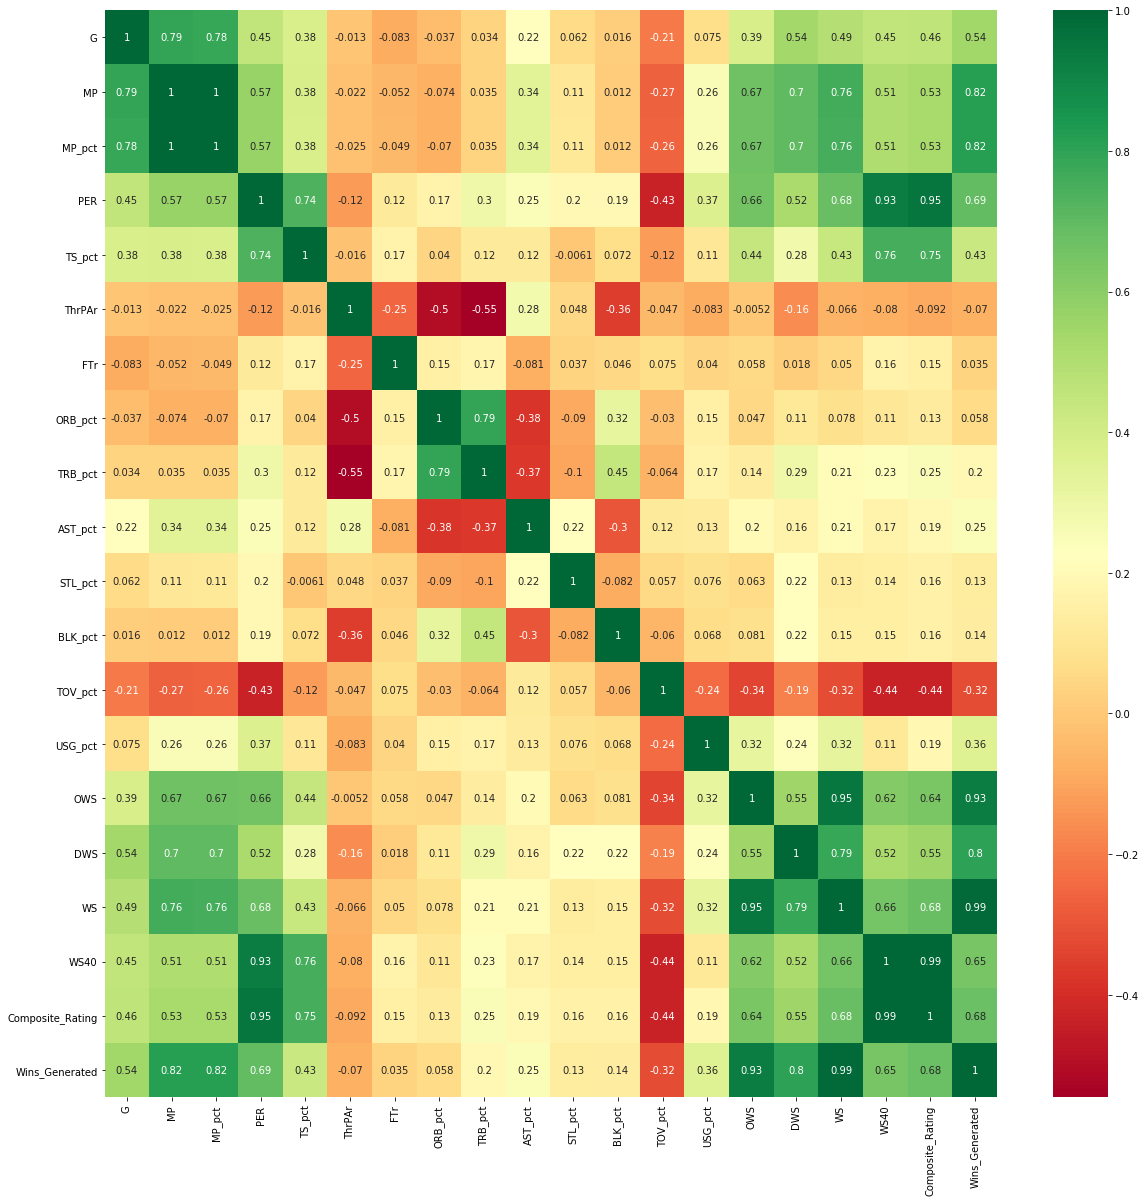

In [16]:
correlation=df.corr()
top_corr_features=correlation.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Dropping all attributes with High Correlation


In [17]:
df = df.drop(columns=['G','MP'])

In [18]:
df = df.drop(columns=['PER','WS','WS40'])

In [19]:
df = df.drop(columns=['DWS','OWS'])


In [20]:
df = df.drop(columns=['ORB_pct','TRB_pct'])

In [21]:
df = df.drop(columns=['Composite_Rating'])

In [22]:
df = df.drop(columns=['MP_pct'])

### Correlation check - post removal of highly correlated attributes

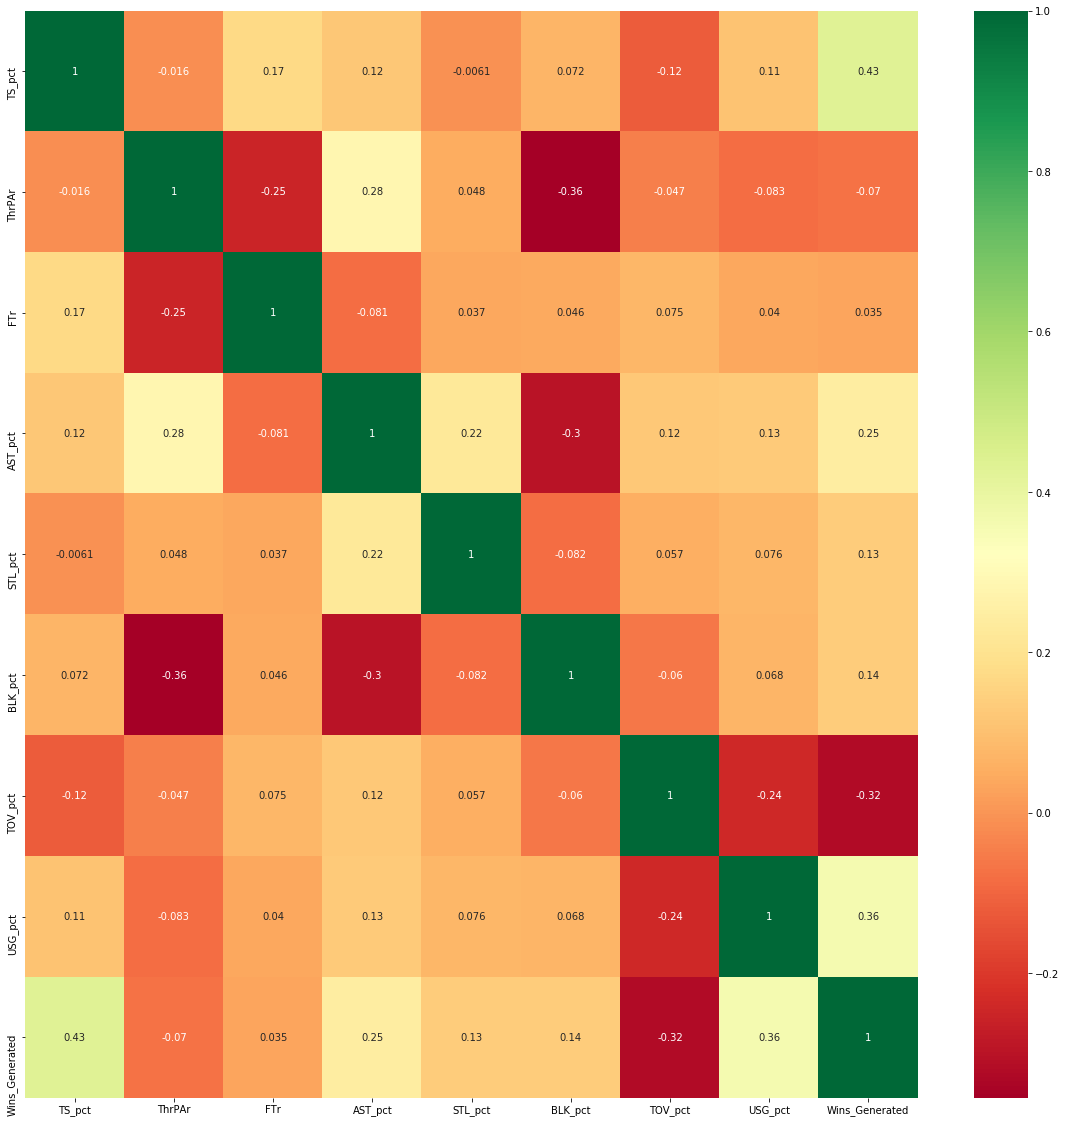

In [23]:
correlation=df.corr()
top_corr_features=correlation.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Skewness check

In [24]:
df.skew()

TS_pct           -0.97
ThrPAr            0.75
FTr               6.52
AST_pct           0.95
STL_pct           4.04
BLK_pct           2.81
TOV_pct           1.56
USG_pct           0.59
Wins_Generated    1.39
dtype: float64

### Dropping high skewed attribute

In [25]:
df=df.drop(columns=['FTr','STL_pct'])

### Histogram

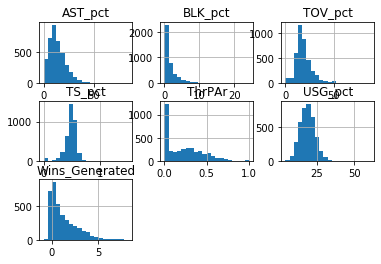

In [26]:
histogram = df.hist(bins=20)
plt.show()

### Boxplot

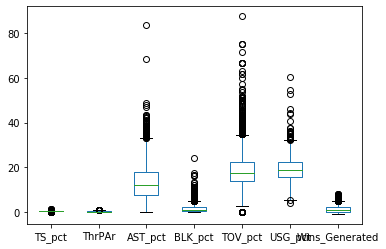

In [27]:
df.plot(kind='box',subplots=False,layout=(3,3),sharex=False,sharey=False)

In [28]:
#Dropping the variable with more outliers
df=df.drop(columns=['TOV_pct']) 

### Density Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C02EED38C8>,
      dtype=object)

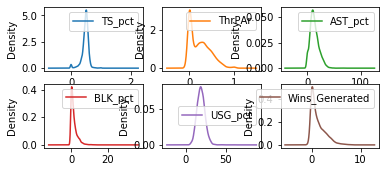

In [29]:
df.plot(kind='density',subplots=True,layout=(3,3),sharex=False,sharey=False)


### Rows and columns after Data cleaning

In [30]:
df.shape

(3839, 6)

### Rescaling Data

In [31]:
array = df.values
x = array[:,0:6]
scale=MinMaxScaler(feature_range=(0,4))
rescaled_data=scale.fit_transform(x)
set_printoptions(precision=5)
print(rescaled_data[0:5,:])

[[1.38667 2.908   0.85919 0.08264 0.94662 0.91566]
 [1.38933 0.      0.37232 0.77686 0.83274 1.48083]
 [1.18667 1.232   0.93556 0.24793 1.3452  0.68784]
 [1.32533 1.252   1.04535 0.13223 1.62989 1.01643]
 [1.13333 0.552   0.6778  0.59504 1.04626 1.09091]]


In [32]:
rescaled_data=pd.DataFrame(rescaled_data)

In [33]:
rescaled_data.describe()

,0,1,2,3,4,5
count,3839.00,3839.00,3839.00,3839.00,3839.00,3839.00
mean,1.28,0.96,0.63,0.25,1.05,0.94
std,0.32,0.90,0.39,0.30,0.36,0.64
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.17,0.06,0.36,0.05,0.80,0.44
50%,1.33,0.82,0.57,0.15,1.04,0.71
75%,1.44,1.58,0.85,0.35,1.28,1.28
max,4.00,4.00,4.00,4.00,4.00,4.00


### Defining Features and Labels

In [34]:
features = rescaled_data.values[:,0:5]
label = rescaled_data.values[:,5]

### Train Test Split


In [35]:
trainfeature,testfeature,trainlabel,testlabel=train_test_split(features,label,test_size=.30,random_state=15)

### Correspondence of training and testing data

In [36]:
print(len(trainfeature))
print(len(trainlabel))
print(len(testfeature))
print(len(testlabel))

2687
2687
1152
1152


## Step 3 - Implementing Algorithm

In [37]:
obj = LinearRegression()
obj.fit(trainfeature,trainlabel)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 4 - Prediction

In [38]:
pred_results = obj.predict(testfeature)

## Step 5 - Evaluation

In [39]:
error = mean_squared_error(testlabel,pred_results)
print('Error rate of the model is {}'.format(error))

Error rate of the model is 0.2617603225021278
